In [1]:
!pip install keras-tuner
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.3/167.3 KB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 40.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.8/112.8 KB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 8.4 MB/s eta 0:00:00
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.

# LSTM Model_S&P500 FROM 2011 TO 2015

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, acf, pacf
import yfinance as yf
import math
from sklearn.metrics import mean_squared_error
import pandas_datareader as pdr
import os
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

# Data Acquisition

In [3]:
df = yf.download('^GSPC',start="2011-01-31", end="2015-12-31",interval='1d')

[*********************100%***********************]  1 of 1 completed


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-12-23,2042.199951,2064.729980,2042.199951,2064.290039,2064.290039,3484090000
2015-12-24,2063.520020,2067.360107,2058.729980,2060.989990,2060.989990,1411860000
2015-12-28,2057.770020,2057.770020,2044.199951,2056.500000,2056.500000,2492510000
2015-12-29,2060.540039,2081.560059,2060.540039,2078.360107,2078.360107,2542000000
2015-12-30,2077.340088,2077.340088,2061.969971,2063.360107,2063.360107,2367430000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1238 entries, 2011-01-31 to 2015-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1238 non-null   float64
 1   High       1238 non-null   float64
 2   Low        1238 non-null   float64
 3   Close      1238 non-null   float64
 4   Adj Close  1238 non-null   float64
 5   Volume     1238 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 67.7 KB


In [6]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-01-31,1276.500000,1287.170044,1276.500000,1286.119995,1286.119995,4167160000
2011-02-01,1289.140015,1308.859985,1289.140015,1307.589966,1307.589966,5164500000
2011-02-02,1305.910034,1307.609985,1302.619995,1304.030029,1304.030029,4098260000
2011-02-03,1302.770020,1308.599976,1294.829956,1307.099976,1307.099976,4370990000
2011-02-04,1307.010010,1311.000000,1301.670044,1310.869995,1310.869995,3925950000
...,...,...,...,...,...,...
2015-12-23,2042.199951,2064.729980,2042.199951,2064.290039,2064.290039,3484090000
2015-12-24,2063.520020,2067.360107,2058.729980,2060.989990,2060.989990,1411860000
2015-12-28,2057.770020,2057.770020,2044.199951,2056.500000,2056.500000,2492510000


# Data Preparation

In [7]:
df["Return"] = df["Adj Close"].pct_change()

In [8]:
df1 = df.drop(columns = ["Open","High","Low","Adj Close", "Volume"])

In [9]:
df1

,Close,Return
Date,,
2011-01-31,1286.119995,NaN
2011-02-01,1307.589966,0.016694
2011-02-02,1304.030029,-0.002723
2011-02-03,1307.099976,0.002354
2011-02-04,1310.869995,0.002884
...,...,...
2015-12-23,2064.290039,0.012418
2015-12-24,2060.989990,-0.001599
2015-12-28,2056.500000,-0.002179


In [10]:
df1["Log_Return"] = np.log(1+df1["Return"])

In [11]:
df1 = df1.dropna()

In [12]:
df2 = df1["Log_Return"]

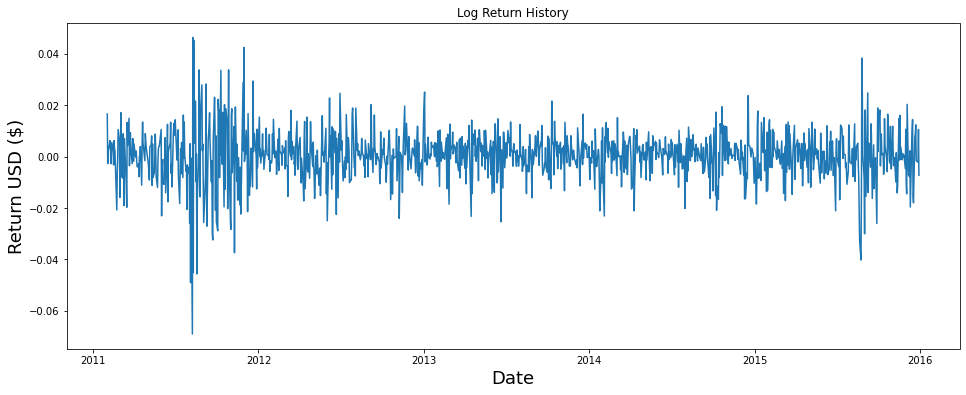

In [13]:
plt.figure(figsize=(16,6))
plt.title('Log Return History')
plt.plot(df2)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Return USD ($)', fontsize=18)
plt.show()

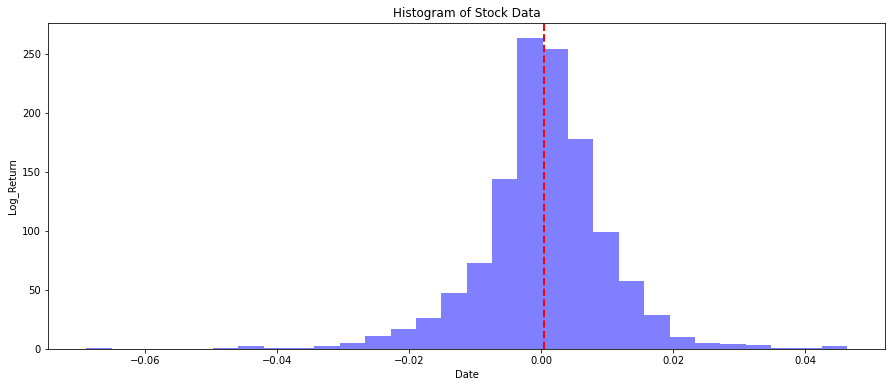

In [14]:
# Create a histogram of stock data
plt.figure(figsize = (15,6))
plt.hist(df2, bins=30, alpha=0.5, color='blue')

# Add a vertical line for the mean
plt.axvline(df2.mean(), color='red', linestyle='dashed', linewidth=2)

# Add labels and title
plt.xlabel("Date")
plt.ylabel("Log_Return")
plt.title('Histogram of Stock Data')

# Show the plot
plt.show()


# Scaling Data

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df3 = scaler.fit_transform(np.array(df2).reshape(-1, 1))

In [16]:
df3

array([[ 1.65094369],
       [-0.31729026],
       [ 0.20101782],
       ...,
       [-0.26162878],
       [ 1.04031133],
       [-0.77838528]])

# Train Test Split

In [17]:
train_size = int(len(df3)*0.8)
test_size = len(df3)-train_size
train_size,test_size

(989, 248)

In [18]:
train_data,test_data = df3[0:train_size],df3[train_size:]

In [19]:
train_data.shape,test_data.shape

((989, 1), (248, 1))

In [20]:
def creat_dataset(data, time_stamp):
    data_x, data_y = [], []
    for i in range(len(data)-time_stamp-1):
        a = data[i: i + time_stamp, 0]
        data_x.append(a)
        b = data[i+time_stamp,0]
        data_y.append(b)
    return data_x, data_y
                

In [21]:
x_train, y_train = creat_dataset(train_data,50)
x_test, y_test = creat_dataset(test_data,50)

In [22]:
x_train = np.asarray(x_train)
x_test = np.asarray(x_test)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)
x_train,x_test

(array([[ 1.65094369, -0.31729026,  0.20101782, ..., -0.44858594,
         -0.32454359, -0.83592525],
        [-0.31729026,  0.20101782,  0.2549833 , ..., -0.32454359,
         -0.83592525, -0.01959059],
        [ 0.20101782,  0.2549833 ,  0.59598605, ..., -0.83592525,
         -0.01959059, -0.03046623],
        ...,
        [ 0.88999934,  1.93977613, -0.78682717, ...,  0.29826346,
          0.04892146, -0.53924077],
        [ 1.93977613, -0.78682717,  1.20921071, ...,  0.04892146,
         -0.53924077, -1.09696329],
        [-0.78682717,  1.20921071,  0.67845415, ..., -0.53924077,
         -1.09696329, -0.07371533]]),
 array([[ 1.14127192,  1.77081947, -0.9004605 , ..., -0.37848157,
          1.19459298, -0.53759694],
        [ 1.77081947, -0.9004605 , -0.86854075, ...,  1.19459298,
         -0.53759694,  0.87685868],
        [-0.9004605 , -0.86854075, -0.3025561 , ..., -0.53759694,
          0.87685868, -0.21736043],
        ...,
        [-0.52156505,  1.46595722,  0.4264661 , ...,  

# Find the correlation in b/w daily Returns

In [23]:
import seaborn as sns 
from sklearn.preprocessing import Normalizer
normalizedx_train = Normalizer().fit_transform(x_train)

normalizedx_train = pd.DataFrame(normalizedx_train)
normalizedx_train

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.272216,-0.052316,0.033145,0.042043,0.098269,0.063854,-0.053384,0.006178,0.086008,0.033661,...,0.105703,-0.037252,0.076893,-0.000623,-0.009462,0.030281,-0.032034,-0.073965,-0.053512,-0.137831
1,-0.054369,0.034445,0.043693,0.102125,0.066360,-0.055479,0.006421,0.089382,0.034982,-0.063358,...,-0.038714,0.079910,-0.000647,-0.009834,0.031470,-0.033291,-0.076867,-0.055612,-0.143240,-0.003357
2,0.034496,0.043757,0.102275,0.066457,-0.055560,0.006430,0.089514,0.035033,-0.063451,0.102576,...,0.080027,-0.000648,-0.009848,0.031516,-0.033340,-0.076980,-0.055694,-0.143450,-0.003362,-0.005228
3,0.043699,0.102140,0.066369,-0.055487,0.006422,0.089395,0.034987,-0.063368,0.102440,0.047038,...,-0.000647,-0.009835,0.031474,-0.033296,-0.076879,-0.055620,-0.143261,-0.003357,-0.005221,0.061851
4,0.100239,0.065134,-0.054454,0.006302,0.087732,0.034335,-0.062188,0.100534,0.046162,0.026452,...,-0.009652,0.030888,-0.032676,-0.075448,-0.054585,-0.140594,-0.003295,-0.005124,0.060700,-0.196767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,-0.004250,0.222564,0.156246,0.340543,-0.138134,0.212286,0.119108,-0.033777,0.205836,-0.031691,...,-0.299781,-0.120871,-0.159623,0.354211,0.418424,0.074862,0.061307,0.024420,-0.009344,0.052362
934,0.222558,0.156242,0.340533,-0.138130,0.212280,0.119105,-0.033776,0.205830,-0.031690,0.104448,...,-0.120867,-0.159618,0.354201,0.418413,0.074860,0.061305,0.024419,-0.009344,0.052361,0.008588
935,0.159511,0.347659,-0.141020,0.216722,0.121597,-0.034483,0.210137,-0.032353,0.106634,0.206382,...,-0.162958,0.361612,0.427168,0.076426,0.062588,0.024930,-0.009540,0.053457,0.008768,-0.096646
936,0.345385,-0.140098,0.215305,0.120801,-0.034257,0.208763,-0.032142,0.105936,0.205032,-0.009107,...,0.359247,0.424374,0.075926,0.062178,0.024767,-0.009477,0.053107,0.008711,-0.096014,-0.195319


# Pearson Correlation

<AxesSubplot:>

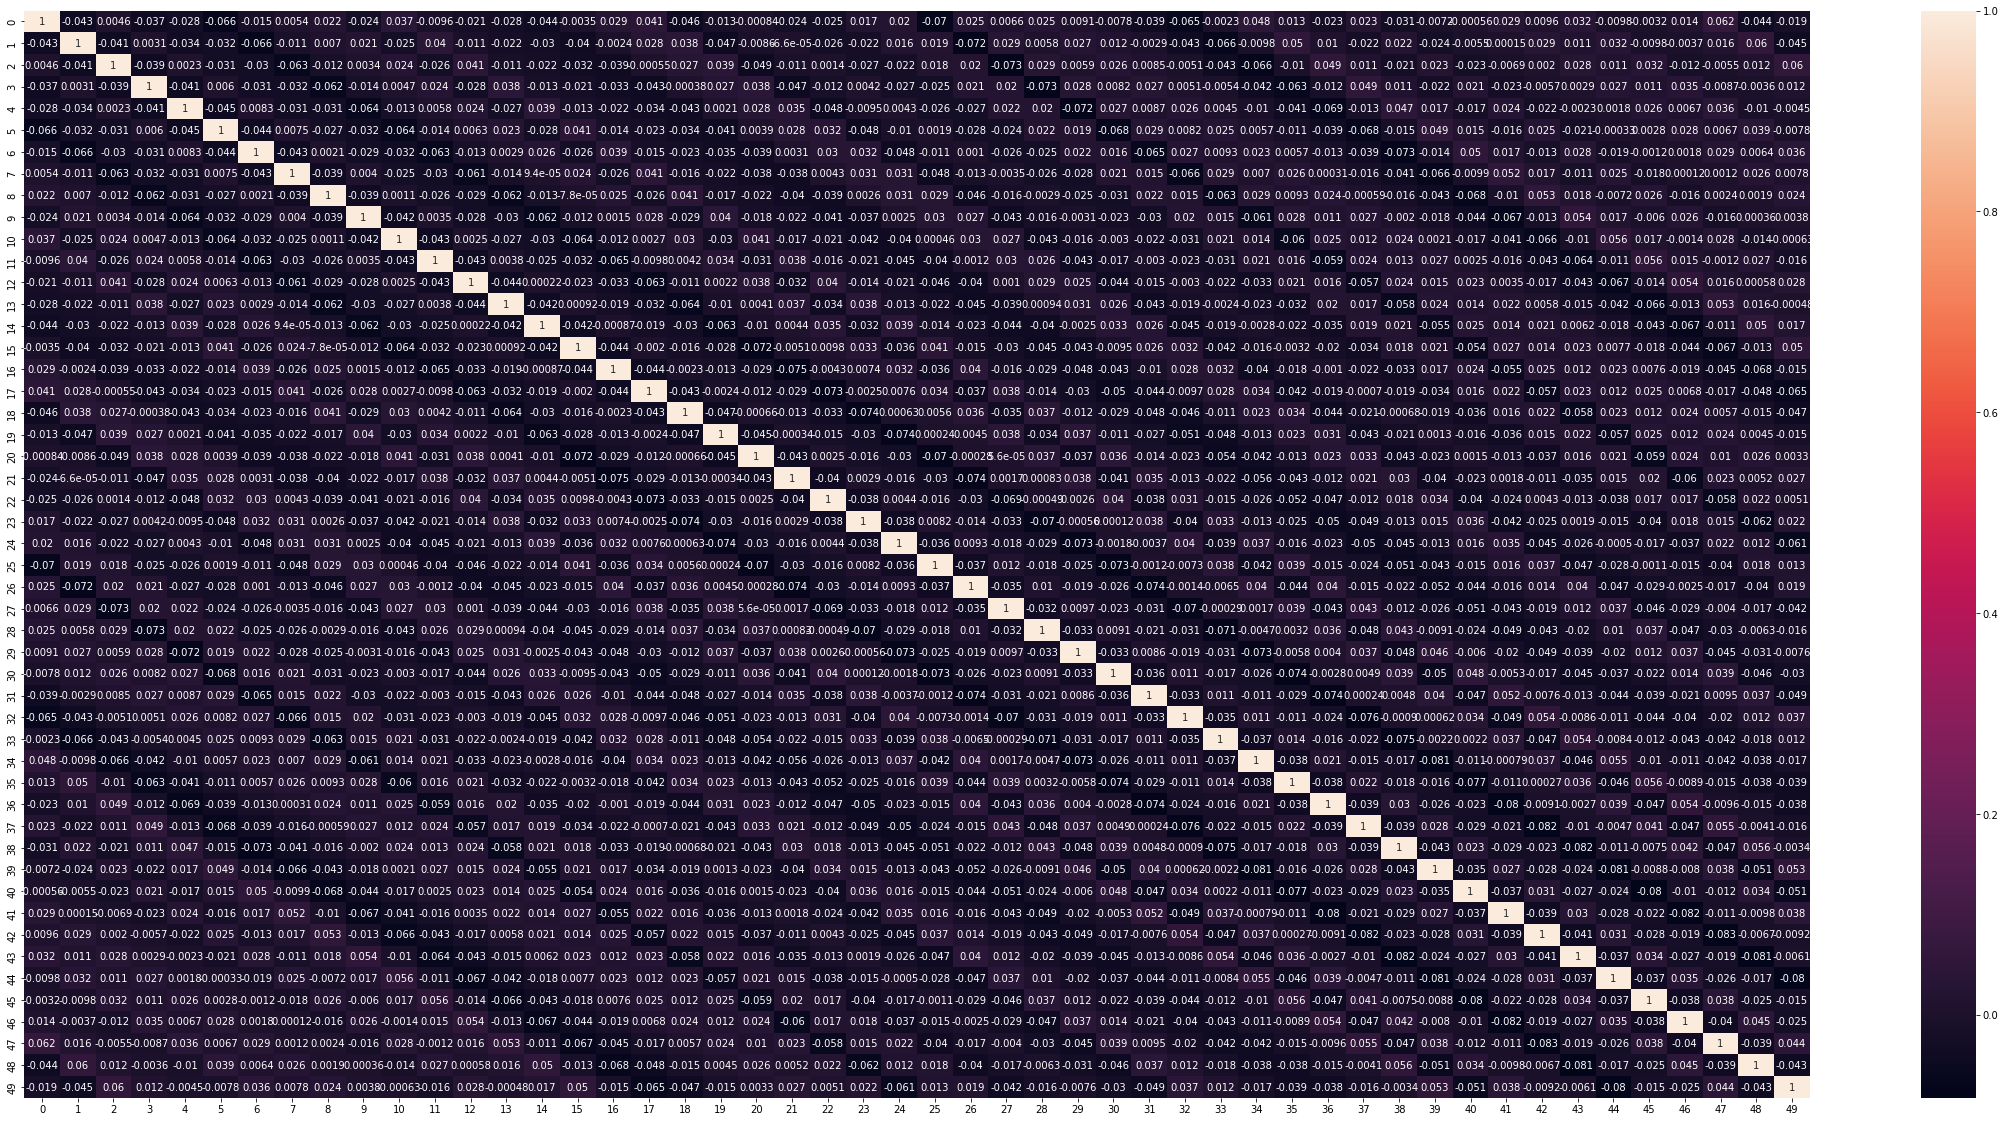

In [24]:
# plot correlation heatmap
plt.figure(figsize = (40,20))
sns.heatmap(normalizedx_train.corr(), annot = True)

In [25]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1],1)

In [26]:
x_train.shape, x_test.shape

((938, 50, 1), (197, 50, 1))

In [27]:
# Building Model

In [28]:
import keras_tuner
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
import tensorflow as tf

<ipython-input-28-3af824b2e207>:5: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import RandomSearch


# Hyperparameter Tuning

In [29]:
my_learning_rate = .00001

In [30]:
def build_model(hp):
    model = Sequential()
    model.add(LSTM(hp.Int('input_unit',min_value=32,max_value=512,step=32),return_sequences=True, input_shape=(50,1)))
    for i in range(hp.Int('n_layers', 1, 4)):
        model.add(LSTM(hp.Int(f'lstm_{i}_units',min_value=32,max_value=512,step=32),return_sequences=True))
    model.add(LSTM(hp.Int('layer_2_neurons',min_value=32,max_value=512,step=32)))
    model.add(Dropout(hp.Float('Dropout_rate',min_value=0,max_value=0.5,step=0.1)))
    model.add(Dense(1, activation=hp.Choice('dense_activation',values=['relu', 'sigmoid'],default='relu')))
    model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.RMSprop(learning_rate=my_learning_rate),metrics = ['mse'])
    return model

In [31]:
tuner_search = RandomSearch(
    build_model,
    objective='mse',
    max_trials=1,
    directory='output',
    project_name='R1_Final_FGMS_LSTM_S&P500_Old-data_model_3'
)

In [32]:
tuner_search.search(
        x=x_train,
        y=y_train,
        epochs=50,
        batch_size=10,
        validation_data=(x_test,y_test),
)

Trial 1 Complete [00h 02m 31s]
mse: 1.0157256126403809

Best mse So Far: 1.0157256126403809
Total elapsed time: 00h 02m 31s


In [33]:
model_1=tuner_search.get_best_models(num_models=1)[0]

In [34]:
# Fitting Model

In [35]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 384)           592896    
                                                                 
 lstm_1 (LSTM)               (None, 50, 448)           1492736   
                                                                 
 lstm_2 (LSTM)               (None, 50, 32)            61568     
                                                                 
 lstm_3 (LSTM)               (None, 50, 32)            8320      
                                                                 
 lstm_4 (LSTM)               (None, 50, 32)            8320      
                                                                 
 lstm_5 (LSTM)               (None, 160)               123520    
                                                                 
 dropout (Dropout)           (None, 160)               0

In [36]:
model_1.fit(x=x_train,
        y=y_train,
        epochs=50,
        batch_size=10,
        validation_data=(x_test,x_test),
)

Epoch 1/50
94/94 [==============================] - 13s 38ms/step - loss: 1.0159 - mse: 1.0159 - val_loss: 1.0004 - val_mse: 1.0004
Epoch 2/50
94/94 [==============================] - 2s 19ms/step - loss: 1.0162 - mse: 1.0162 - val_loss: 1.0010 - val_mse: 1.0010
Epoch 3/50
94/94 [==============================] - 2s 22ms/step - loss: 1.0161 - mse: 1.0161 - val_loss: 1.0015 - val_mse: 1.0015
Epoch 4/50
94/94 [==============================] - 2s 22ms/step - loss: 1.0164 - mse: 1.0164 - val_loss: 1.0008 - val_mse: 1.0008
Epoch 5/50
94/94 [==============================] - 2s 20ms/step - loss: 1.0159 - mse: 1.0159 - val_loss: 1.0017 - val_mse: 1.0017
Epoch 6/50
94/94 [==============================] - 2s 24ms/step - loss: 1.0164 - mse: 1.0164 - val_loss: 1.0017 - val_mse: 1.0017
Epoch 7/50
94/94 [==============================] - 3s 33ms/step - loss: 1.0156 - mse: 1.0156 - val_loss: 1.0024 - val_mse: 1.0024
Epoch 8/50
94/94 [==============================] - 2s 19ms/step - loss: 1.0159 - 

In [37]:
train_pred = model_1.predict(x_train)
test_pred = model_1.predict(x_test)

7/7 [==============================] - 0s 8ms/step


In [38]:
train_pred.shape

(938, 1)

In [39]:
y_train.shape, train_pred.shape

((938,), (938, 1))

# Accuracy of Model

In [43]:
rmse = np.sqrt(mean_squared_error(y_true = y_train, y_pred = train_pred))
print("RMSE: {:.2f}".format(rmse))

RMSE: 1.01


In [44]:
rmse = np.sqrt(mean_squared_error(y_true = y_test, y_pred = test_pred))
print("RMSE: {:.2f}".format(rmse))

RMSE: 1.02


In [45]:
train_pred = scaler.inverse_transform(train_pred)
test_pred = scaler.inverse_transform(test_pred)
train_pred.shape, test_pred.shape

((938, 1), (197, 1))

In [46]:
math.sqrt(mean_squared_error(y_train, train_pred))

1.0089116670919198

In [47]:
math.sqrt(mean_squared_error(y_test, test_pred))

1.019872039500161

In [48]:
df3.shape

(1237, 1)

In [49]:
import numpy
### Plotting 
# shift train predictions for plotting
look_back = 50
trainPredictPlot = numpy.empty_like(df3)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_pred)+look_back, :] = train_pred

In [50]:
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df3)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_pred)+(look_back*2)+1:len(df3)-1, :] = test_pred

In [51]:
testPredictPlot

array([[       nan],
       [       nan],
       [       nan],
       ...,
       [0.00086811],
       [0.00097289],
       [       nan]])

In [52]:
df3 = scaler.inverse_transform(df3)

# Visualization of Results

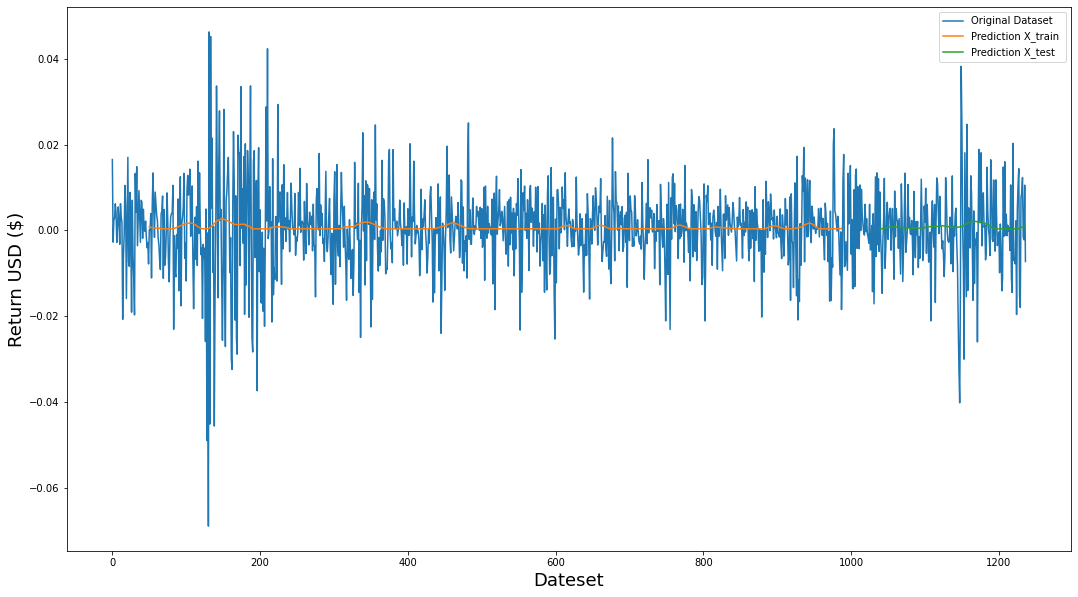

In [53]:
# plot baseline and predictions
plt.figure(figsize = (18,10))
plt.plot((df3),label = "Original Dataset ")
plt.plot((trainPredictPlot),label= "Prediction X_train ")
plt.plot((testPredictPlot),label = "Prediction X_test ")
plt.xlabel('Dateset', fontsize=18)
plt.ylabel('Return USD ($)', fontsize=18)
plt.legend()
plt.show()

In [54]:
len(train_data),len(test_data)

(989, 248)

In [55]:
time_stamp = 50
var = len(test_data)-time_stamp
x_input = test_data[var:].reshape(1,-1)
x_input.shape

(1, 50)

In [56]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()


In [57]:
# demonstrate prediction for next 1 days
from numpy import array

lst_output=[]
n_steps=50
i=0
while(i<1):
    
    if(len(temp_input)>n_steps):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model_1.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model_1.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    


[0.07003742]
51


In [58]:
lst_output = scaler.inverse_transform(lst_output)

In [59]:
day_new=np.arange(1,51)
day_pred=np.arange(51,52)

In [60]:
import matplotlib.pyplot as plt

In [61]:
len(df3)

1237

# Ploting Predicted Value

Text(0, 0.5, 'Return USD ($)')

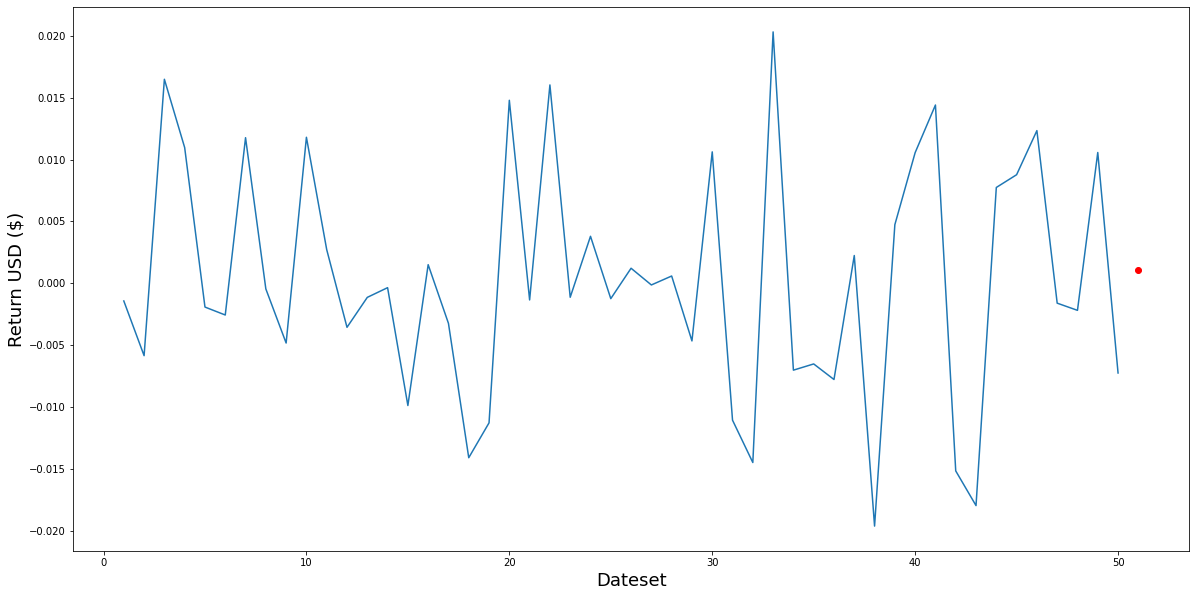

In [62]:
var_1 = len(df3)-time_stamp
plt.figure(figsize = (20,10))
plt.plot(day_new,(df3[var_1:]))
plt.scatter(day_pred,(lst_output), c = "r")
plt.xlabel('Dateset', fontsize=18)
plt.ylabel('Return USD ($)', fontsize=18)

Text(0, 0.5, 'Return USD ($)')

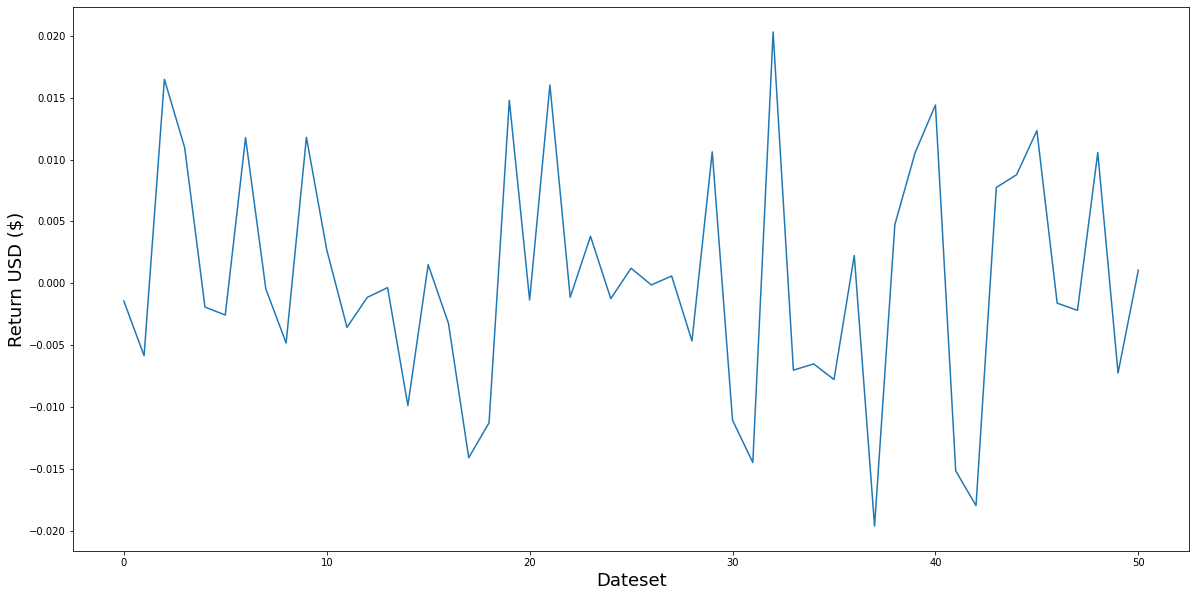

In [63]:
plt.figure(figsize = (20,10))
df3 = df3.tolist()
df3.extend((lst_output))
plt.plot((df3[var_1:]))
plt.xlabel('Dateset', fontsize=18)
plt.ylabel('Return USD ($)', fontsize=18)

# Loading New Data for Cross Checking

In [64]:
check_df = yf.download('^GSPC',start="2015-12-01", end="2016-01-04",interval='1d')

[*********************100%***********************]  1 of 1 completed


In [65]:
check_df["Close"].tail(10)

Date
2015-12-17    2041.890015
2015-12-18    2005.550049
2015-12-21    2021.150024
2015-12-22    2038.969971
2015-12-23    2064.290039
2015-12-24    2060.989990
2015-12-28    2056.500000
2015-12-29    2078.360107
2015-12-30    2063.360107
2015-12-31    2043.939941
Name: Close, dtype: float64

In [66]:
check_df["Return"] = check_df.Close.pct_change()

In [67]:
check_df1 = check_df["Return"].dropna()
check_df1,df1[1425:]

(Date
 2015-12-02   -0.010996
 2015-12-03   -0.014374
 2015-12-04    0.020526
 2015-12-07   -0.006990
 2015-12-08   -0.006490
 2015-12-09   -0.007739
 2015-12-10    0.002251
 2015-12-11   -0.019423
 2015-12-14    0.004756
 2015-12-15    0.010619
 2015-12-16    0.014515
 2015-12-17   -0.015041
 2015-12-18   -0.017797
 2015-12-21    0.007778
 2015-12-22    0.008817
 2015-12-23    0.012418
 2015-12-24   -0.001599
 2015-12-28   -0.002179
 2015-12-29    0.010630
 2015-12-30   -0.007217
 2015-12-31   -0.009412
 Name: Return, dtype: float64, Empty DataFrame
 Columns: [Close, Return, Log_Return]
 Index: [])

In [68]:
for_adding_date = yf.download('^GSPC',start="2011-01-31", end="2015-12-31",interval='1d')
for_adding_date.shape
for_adding_date.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-12-23,2042.199951,2064.729980,2042.199951,2064.290039,2064.290039,3484090000
2015-12-24,2063.520020,2067.360107,2058.729980,2060.989990,2060.989990,1411860000
2015-12-28,2057.770020,2057.770020,2044.199951,2056.500000,2056.500000,2492510000
2015-12-29,2060.540039,2081.560059,2060.540039,2078.360107,2078.360107,2542000000
2015-12-30,2077.340088,2077.340088,2061.969971,2063.360107,2063.360107,2367430000


In [69]:
df4 = pd.DataFrame(df3)

In [70]:
df4 = df4.set_index(for_adding_date.index)

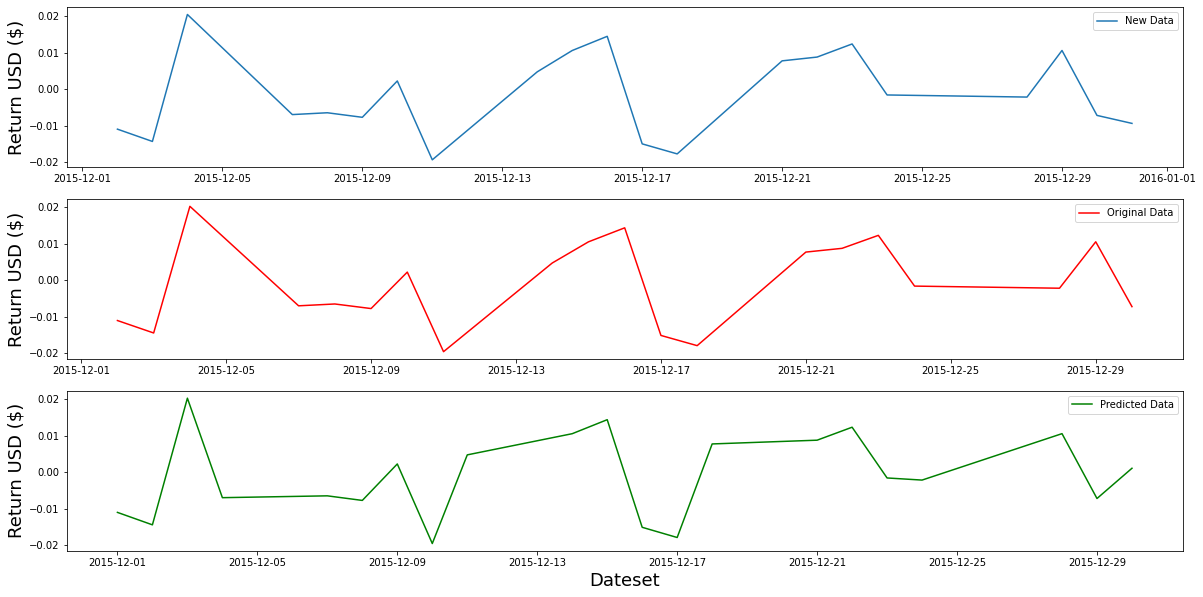

In [71]:
# Ploting Final comparision 
plt.figure(figsize = (20,10))
plt.subplot(3,1,1)
plt.plot(check_df1,label = "New Data")
plt.ylabel('Return USD ($)', fontsize=18)
plt.legend()
plt.subplot(3,1,2)
plt.plot(df2[var_1+30:], label = "Original Data", color = "r")
plt.ylabel('Return USD ($)', fontsize=18)
plt.legend()
plt.subplot(3,1,3)
plt.plot(df4[var_1+30:], label = "Predicted Data", c = "g")
plt.xlabel('Dateset', fontsize=18)
plt.ylabel('Return USD ($)', fontsize=18)
plt.legend()